This is set to analyze the tmdb dataset of movies containing 21 columns. First of all i intend to clean the data by removing null values and irrelevant columns to my analysis. I will then use the dataset to answer a few questions like
1. most popular movie
2. production companies with the highest numbers of movies
3. movies with highest budget/funding
4. movies with highest revenue
5. most popular director
6. movies with the highest votes
7. longest and shortest movies
8. oldest movies in this database
0. Find correlation among columns

importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#importing the dataset
df=pd.read_csv('tmdb-movies.csv')

I downloaded the dataset from udacity page and created a folder for this dataset and the analysis python file. I then used jupyter notebookt with pandas library to create a .py file for analysis and imported the dataset using pd.read_csv

In [3]:
#checking the dataframe
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


cleaning phase

In [4]:
#checking data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

Before we remove the null values in the dataset, we need to make sure that we dont loose to much data so i had to check the columns and drop columns i dont need so they do not affect the data wen i'm dropping null records.

In [5]:
df['keywords'].head()

0    monster|dna|tyrannosaurus rex|velociraptor|island
1     future|chase|post-apocalyptic|dystopia|australia
2    based on novel|revolution|dystopia|sequel|dyst...
3                android|spaceship|jedi|space opera|3d
4                  car race|speed|revenge|suspense|car
Name: keywords, dtype: object

In [6]:
df.drop('keywords',axis=1,inplace=True)

In [7]:
df['tagline'].head()

0                The park is open.
1               What a Lovely Day.
2       One Choice Can Destroy You
3    Every generation has a story.
4              Vengeance Hits Home
Name: tagline, dtype: object

In [8]:
df['tagline'].head()

0                The park is open.
1               What a Lovely Day.
2       One Choice Can Destroy You
3    Every generation has a story.
4              Vengeance Hits Home
Name: tagline, dtype: object

In [9]:
df.drop('tagline',axis=1,inplace=True)

In [10]:
df['homepage'].head()

0                        http://www.jurassicworld.com/
1                          http://www.madmaxmovie.com/
2       http://www.thedivergentseries.movie/#insurgent
3    http://www.starwars.com/films/star-wars-episod...
4                             http://www.furious7.com/
Name: homepage, dtype: object

In [11]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


In [12]:
#dropping null values from the dataset
df=df.dropna(axis=0,how='any')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2637 entries, 0 to 10819
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    2637 non-null   int64  
 1   imdb_id               2637 non-null   object 
 2   popularity            2637 non-null   float64
 3   budget                2637 non-null   int64  
 4   revenue               2637 non-null   int64  
 5   original_title        2637 non-null   object 
 6   cast                  2637 non-null   object 
 7   homepage              2637 non-null   object 
 8   director              2637 non-null   object 
 9   overview              2637 non-null   object 
 10  runtime               2637 non-null   int64  
 11  genres                2637 non-null   object 
 12  production_companies  2637 non-null   object 
 13  release_date          2637 non-null   object 
 14  vote_count            2637 non-null   int64  
 15  vote_average        

In the above data cleaning phase, i dropped 3 columns:tagline, keywords and homepage as they had the highest number of null values and would've greattly affected the analysis if their null rows were dropped. They are however of little or no relevance to the intended analysis. 

In [44]:
#most popular movie base on the popularity column
most_popular=df['popularity'].max()
df[df['popularity']==most_popular]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,137999939.3,1.392446e+09


In [133]:
# production companies with the highest numbers of movies
high_prod_companies=df['production_companies'].value_counts().head()
high_prod_companies=pd.DataFrame(high_prod_companies.head())
high_prod_companies.reset_index()
index=high_prod_companies.index
high_prod_companies

,production_companies
Walt Disney Pictures,18
Pixar Animation Studios,15
Walt Disney Pictures|Pixar Animation Studios,15
DreamWorks Animation,15
Marvel Studios,11


[Text(0.5, 1.0, 'Top 5 production companies')]

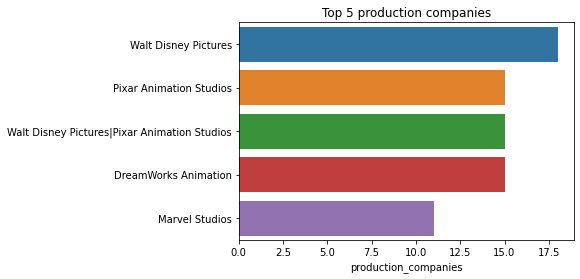

In [138]:
sns.barplot(y=index,x='production_companies',data=high_prod_companies).set(title='Top 5 production companies')

This is a chart to show the top 5 production companies ranked by the number of movies they have each produced

In [160]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,174799923.1,1.385749e+09


movies with highest budget/funding

In [165]:
most_funded=df.sort_values(by='budget',ascending=False).head()

In [166]:
most_funded

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2244,46528,tt1032751,0.250540,425000000,11087569,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,http://www.iamrogue.com/thewarriorsway,Sngmoo Lee,An Asian assassin (Dong-gun Jang) is forced to...,100,Adventure|Fantasy|Action|Western|Thriller,Boram Entertainment Inc.,2010-12-02,74,6.4,2010,425000000.0,1.108757e+07
3375,1865,tt1298650,4.955130,380000000,1021683000,Pirates of the Caribbean: On Stranger Tides,Johnny Depp|PenÃ©lope Cruz|Geoffrey Rush|Ian M...,http://disney.go.com/pirates/index-on-stranger...,Rob Marshall,Captain Jack Sparrow crosses paths with a woma...,136,Adventure|Action|Fantasy,Walt Disney Pictures|Jerry Bruckheimer Films|M...,2011-05-11,3180,6.3,2011,368371256.2,9.904175e+08
7387,285,tt0449088,4.965391,300000000,961000000,Pirates of the Caribbean: At World's End,Johnny Depp|Orlando Bloom|Keira Knightley|Geof...,http://disney.go.com/disneypictures/pirates/,Gore Verbinski,"Captain Barbossa, long believed to be dead, ha...",169,Adventure|Fantasy|Action,Walt Disney Pictures|Jerry Bruckheimer Films|S...,2007-05-19,2626,6.8,2007,315500574.8,1.010654e+09
14,99861,tt2395427,5.944927,280000000,1405035767,Avengers: Age of Ultron,Robert Downey Jr.|Chris Hemsworth|Mark Ruffalo...,http://marvel.com/movies/movie/193/avengers_ag...,Joss Whedon,When Tony Stark tries to jumpstart a dormant p...,141,Action|Adventure|Science Fiction,Marvel Studios|Prime Focus|Revolution Sun Studios,2015-04-22,4304,7.4,2015,257599886.7,1.292632e+09
6570,1452,tt0348150,1.957331,270000000,391081192,Superman Returns,Brandon Routh|Kevin Spacey|Kate Bosworth|James...,http://www.superman.com,Bryan Singer,"Set 5 years after the end of Superman II, the ...",154,Adventure|Fantasy|Action|Science Fiction,DC Comics|Legendary Pictures|Warner Bros.|Bad ...,2006-06-28,834,5.3,2006,292050672.7,4.230205e+08


[Text(0.5, 1.0, 'most funded movies')]

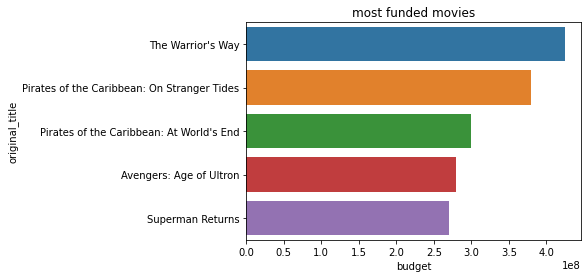

In [169]:
sns.barplot(x='budget',y='original_title',data=most_funded).set(title='most funded movies')

This is a barplot that illustrates the top 5 most funded movies with the highest budget

In [16]:
#movies with highest revenue 
highest_revenue=df['revenue'].max()
df[df['revenue']==highest_revenue]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1386,19995,tt0499549,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,http://www.avatarmovie.com/,James Cameron,"In the 22nd century, a paraplegic Marine is di...",162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,12/10/2009,8458,7.1,2009,240886902.9,2.827124e+09


In [17]:
#most popular director
df['director'].value_counts().head(1)

John Carpenter    17
Name: director, dtype: int64

In [18]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'overview', 'runtime', 'genres',
       'production_companies', 'release_date', 'vote_count', 'vote_average',
       'release_year', 'budget_adj', 'revenue_adj'],
      dtype='object')

In [19]:
df['vote_average'].max()

8.5

In [20]:
#movies with the highest votes
df[df['vote_average']==df['vote_average'].max()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
3690,68450,tt1646967,0.321341,0,0,The Art of Flight,Travis Rice|Nicolas Muller|Mark Landvik|Jake B...,http://www.artofflightmovie.com/,Curt Morgan,A new breed of action sports film comes to lif...,80,Adventure|Documentary,Red Bull Media House|Brain Farm Digital Cinema,9/8/2011,60,8.5,2011,0.0,0.0


In [21]:
#longest and shortest movies
#longest
df[df['runtime']==df['runtime'].max()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2722,331214,tt0185906,0.537593,0,125000000,Band of Brothers,Damian Lewis|Ron Livingston|Frank John Hughes|...,http://www.hbo.com/band-of-brothers,Phil Alden Robinson|Richard Loncraine|Mikael S...,Drawn from interviews with survivors of Easy C...,705,Action|Drama|War,HBO,9/9/2001,313,8.0,2001,0.0,153936014.6


In [22]:
df = df.drop(df[df.runtime==0].index)

In [184]:
#shortest movies
df[df['runtime']==df['runtime'].min()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
8706,13930,tt0248808,0.811101,0,0,For the Birds,Ralph Eggleston,http://www.pixar.com/short_films/Theatrical-Sh...,Ralph Eggleston,"One by one, a flock of small birds perches on ...",3,Animation|Comedy|Family,Pixar Animation Studios,2000-11-01,247,7.7,2000,0.0,0.0


TO GET THE ACTORS AND THE NUMBER OF MOVIES THEY STAR IN

In [186]:
#FUNCTION TO GET ACTORS IN ALL THE MOVIES
def get_actor_movies(actor):
    def is_cast(movie):
        val = movie['cast'].find(actor)
        if val == -1:
            return False
        return True
    return df.apply(is_cast, axis=1).sum()


In [187]:
#TO COUNT THE NUMBER OF OCCURENCES OF ACTOR NAME TO GET NUMBER OF MOVIES STARRED IN
Warren_Frost = get_actor_movies('Warren Frost')

In [188]:
Warren_Frost

0

In [176]:
#SPLITTING THE CAST COLUMN
cast=(df['cast'].str.split('|'))

In [177]:
a = set()

names = ['fred', 'sam', 'fred', 'kate']
# for n in names:
#     a.add(n)
set(names)
a

set()

In [178]:
print(type(cast))

<class 'pandas.core.series.Series'>


In [179]:
unique_casts = set()

To get names of all the individual cast/actors

In [183]:
for i in cast.index:
    for name in cast[i]:
        unique_casts.add(name)

In [182]:
unique_casts

{'Bonnie Hunt',
 'Jon Foster',
 'Gloria Foster',
 'Nick Ashy Holden',
 'Paul Henri',
 'James H. Billington',
 'Vince Gilligan',
 'Socratis Otto',
 'Donald Pleasence',
 'Shaughan Seymour',
 'Patrick Rutnam',
 'Matthew Lewis',
 'Baby Norman',
 'Jeffrey Combs',
 'Geena Davis',
 'Mia Kirshner',
 'James Callis',
 'Stephen Hagan',
 'Brandon Ratcliff',
 'Simona Brhlikova',
 'Cody Longo',
 'Giorgi Tsaava',
 'M.C. Gainey',
 'Laura DiDio',
 'Daisuke Nakazama',
 'Abhishek Bachchan',
 'Toby Kebbell',
 'Daniel Radcliffe',
 'DragoÈ™ Bucur',
 'Birgit Minichmayr',
 'Leopold Nilsson',
 'Armand Assante',
 'George Coe',
 'Anonyops',
 'Adam Beach',
 'Barbara Crampton',
 'Meat Loaf',
 'Taye Diggs',
 'Daniel Roebuck',
 'Sebastian Koch',
 'Frances de la Tour',
 'Zekeria Ebrahimi',
 'Michael Herbig',
 'Walter Koenig',
 'Bill Goldberg',
 'Penny Downie',
 'Holly Hunter',
 'Hiroyuki Sanada',
 'Michael J. Fox',
 'Heather Hopper',
 'Leonardo Sbaraglia',
 'David Strathairn',
 'Jorma Taccone',
 'Jason Vail',
 'MÃ©la

In [33]:
# a=[]
# for i in unique_casts:
#     unique_casts, len(get_actor_movies(i))

In [34]:
get_actor_movies("Jeffrey Falcon")

0

to get the number of movies each dataset shoud have their own solutoon

In [91]:
num_movies = {}
for i, cast in enumerate(unique_casts):
    movie_count = get_actor_movies(cast)
    num_movies[cast] = movie_count
    if i % 50 == 0:
        print(f'processing {i}...')


processing 0...
processing 50...
processing 100...
processing 150...
processing 200...
processing 250...
processing 300...
processing 350...
processing 400...
processing 450...
processing 500...
processing 550...
processing 600...
processing 650...
processing 700...
processing 750...
processing 800...
processing 850...
processing 900...
processing 950...
processing 1000...
processing 1050...
processing 1100...
processing 1150...
processing 1200...
processing 1250...
processing 1300...
processing 1350...
processing 1400...
processing 1450...
processing 1500...
processing 1550...
processing 1600...
processing 1650...
processing 1700...
processing 1750...
processing 1800...
processing 1850...
processing 1900...
processing 1950...
processing 2000...
processing 2050...
processing 2100...
processing 2150...
processing 2200...
processing 2250...
processing 2300...
processing 2350...
processing 2400...
processing 2450...
processing 2500...
processing 2550...
processing 2600...
processing 2650.

In [97]:
sorted_actor_list = { key: value for key, value in sorted(num_movies.items(),  key=lambda item: item[1], reverse=True)}

In [98]:
sorted_actor_list

{'Adam': 100,
 'Matt Damon': 25,
 'Samuel L. Jackson': 23,
 'Mark Wahlberg': 20,
 'Jason Statham': 19,
 'Ryan Reynolds': 19,
 'Brad Pitt': 18,
 'John Goodman': 18,
 'James Franco': 17,
 'Jeff Bridges': 17,
 'Tom Hanks': 17,
 'Seth Rogen': 17,
 'Jason Bateman': 17,
 'Emily Blunt': 17,
 'George Clooney': 17,
 'Ewan McGregor': 17,
 'Robert Downey Jr.': 17,
 'Elizabeth Banks': 17,
 'Anne Hathaway': 17,
 'Cameron Diaz': 17,
 'Morgan Freeman': 17,
 'Jennifer Aniston': 16,
 'Pierce Brosnan': 16,
 'Susan Sarandon': 16,
 'Paul Rudd': 16,
 'Liam Neeson': 16,
 'Owen Wilson': 16,
 'Bill Nighy': 16,
 'Colin Farrell': 15,
 'Ben Affleck': 15,
 'Bradley Cooper': 15,
 'Nicolas Cage': 15,
 'Ralph Fiennes': 15,
 'Julianne Moore': 15,
 'Michael Fassbender': 15,
 'Johnny Depp': 15,
 'Charlize Theron': 15,
 'Guy Pearce': 15,
 'Dwayne Johnson': 15,
 'Christian Bale': 15,
 'Cate Blanchett': 15,
 'Kate Winslet': 15,
 'Rachel Weisz': 15,
 'Jessica Chastain': 15,
 'Woody Harrelson': 15,
 'Harrison Ford': 15,
 'S

In [100]:
#Sorting data according to the number of novues they act
data_items=sorted_actor_list.items()
data_list=list(data_items)
actors_df=pd.DataFrame(data_list)

In [101]:
#checking the dataframe
actors_df.head()

,0,1
0,Adam,100
1,Matt Damon,25
2,Samuel L. Jackson,23
3,Mark Wahlberg,20
4,Jason Statham,19


In [35]:
#converting the date column to date_time data type
df["release_date"]=pd.to_datetime(df['release_date'])

In [36]:
#checking type
print(type(df['release_date'][0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [37]:
#to find the latest movie
latest_mov=df['release_date'].max()
df[df['release_date']==latest_mov]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
190,382517,tt4938374,0.773909,0,0,Open Season: Scared Silly,Garry Chalk|Kathleen Barr|Willa Townsend|Melis...,http://www.sonypictures.com/movies/openseasons...,David Feiss,The humans and animals believe a werewolf is o...,85,Animation|Comedy|Family|Adventure,Sony Pictures Animation,2015-12-31,33,5.6,2015,0.0,0.0


In [38]:
#the oldest movie
oldest_mov=df['release_date'].min()
df[df['release_date']==oldest_mov]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10131,430,tt0055256,0.303783,3000000,4000000,"One, Two, Three",James Cagney|Liselotte Pulver|Horst Buchholz|P...,"http://en.wikipedia.org/wiki/One,_Two,_Three",Billy Wilder,"One, Two, Three â€“ A scorching business comed...",115,Comedy|Family,The Mirisch Corporation,1961-12-15,30,7.5,1961,21884583.62,29179444.83


In [191]:
df1=df.drop(columns=['id','budget_adj','revenue_adj'],axis=1)

In [192]:
#finding correlation in dataset
cor=df1.corr()

Text(32.09375, 0.5, 'coloumns')

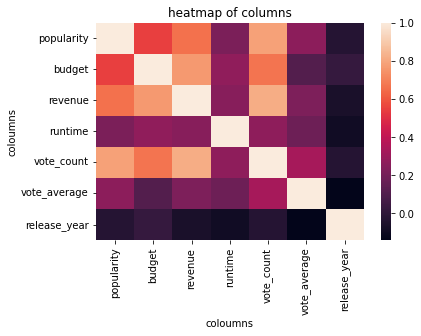

In [195]:
ax = plt.axes()
sns.heatmap(cor, ax = ax)
ax.set_title('heatmap of columns')
ax.set_xlabel('coloumns')
ax.set_ylabel('coloumns')

This is a correlationsl heatmap that shows the correlation between the columns in the dataset and hence explains what factor might influence the other.

To confirm this, we'l do a scatterplot between the variables with the highest an lowest correlation index

Text(0.5, 1.0, 'scatterplot of votecount against popularity')

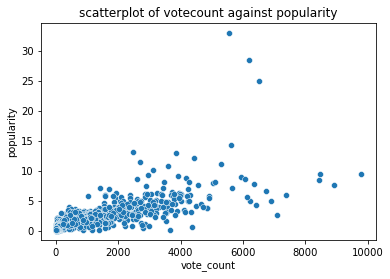

In [197]:
an=plt.axes()
sns.scatterplot(x='vote_count',y='popularity',data=df1)
an.set_title('scatterplot of votecount against popularity')

There is an obvious increase in popularity as the vote_count increases

Text(0.5, 1.0, 'scatterplot of release_year against vote_averagey')

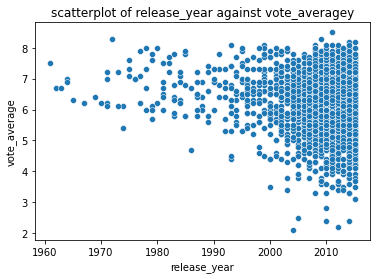

In [199]:
ab=plt.axes()
sns.scatterplot(x='release_year',y='vote_average',data=df1)
ab.set_title('scatterplot of release_year against vote_average')

Theres an ubvious decline in the points showing the negative correlation

In [55]:
cast.count()

9758

REFERENCE SITES INCLUDE
https://stackoverflow.com/questions/48590268/pandas-get-the-most-frequent-values-of-a-column

https://stackoverflow.com/questions/46327501/dropping-columns-with-n-nans-excluding-specific-columns

https://twitter.com/TomEkpot/status/1531057001530261504 -AID FROM TWITTER



FEEDBACK FOR CORRECTIONS
1. Your code runs with an error.
2. As a data scientist, you'll frequently interact with NumPy arrays, pandas Series, and pandas DataFrames, and you'll leverage   a variety of NumPy and pandas methods to perform your desired computations. Understanding how NumPy and pandas work together   will prove to be very useful.
3. Please define at least a function in order to meet this requirement :wink:. This is important because you avoid repetitive     code, which will make you very efficient. One way to define one is to use it to plot, you can check here for more         information.   Matplotlib - Introduction to Python Plots with Examples | ML+ (https://www.machinelearningplus.com/plots/matplotlib-tutorial-complete-guide-python-plot-examples/)
4. Include conclusion
5. describe your plots and graphs
6. Properly label charts

Conclusion
From this data, i've been able to learn the following
1. There is a high correlation between budget and revenue therefore we can conclude that the more money invested in a movie,      the more the revenue from the movie will be.
2. positive correlation between popularity and vote count therefore its safe to say the higher the number of vote_counts, the      higher the popularity index.
3. The oldest movie in the data set is:The Mirisch Corporation	1961-12-15	